Question 1

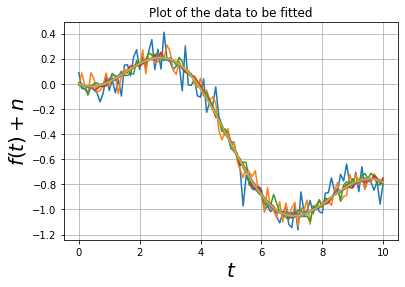

In [3]:
#Question 1:

# script to generate data files for the least squares assignment
from pylab import *
import scipy.special as sp
N=101                           # no of data points
k=9                             # no of sets of data with varying noise

# generate the data points and add noise
t=linspace(0,10,N)              # t vector
y=1.05*sp.jn(2,t)-0.105*t       # f(t) vector
Y=meshgrid(y,ones(k),indexing='ij')[0] # make k copies
scl=logspace(-1,-3,k)           # noise stdev
n=dot(randn(N,k),diag(scl))     # generate k vectors
yy=Y+n                          # add noise to signal

# shadow plot
plot(t,yy)
xlabel(r'$t$',size=20)
ylabel(r'$f(t)+n$',size=20)
title(r'Plot of the data to be fitted')
grid(True)
savetxt("fitting.dat",c_[t,yy]) # write out matrix to file
show()

Questions 2 and 3

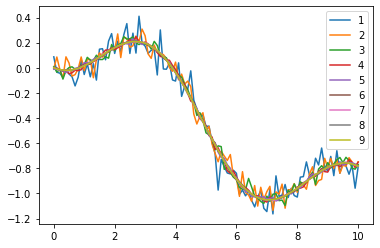

In [4]:
#Questions 2 and 3:

#importing numpy library for array related operations
import numpy as np

#loading the file
file = np.loadtxt("fitting.dat")

for i in range(1,np.shape(file)[1]):   #traversing the file column by column   
    string = str(i)                    #cnverting into string for label
    plot(file[:, 0], file[:,i], label = string)   #plotting the graph of the function+noise vs time
    plt.legend(loc = "upper right")    #legend to be placed in upper right corner

Question 4

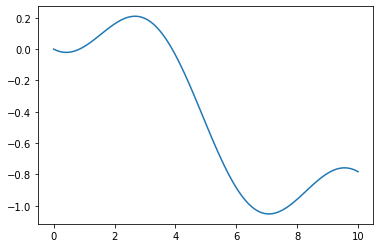

In [5]:
#Question 4:

#Defining a function
def g(t, A, B):
    x = (A * sp.jn(2,t)) + (B * t)    #computing the value as given in the question
    return x                          
plot(file[:, 0], g(file[:, 0], 1.05, -0.105))   #plotting the graph of the function vs time without noise

Question 5

<ErrorbarContainer object of 3 artists>

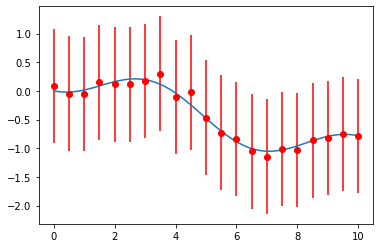

In [6]:
#Question 5:

plot(file[:, 0], g(file[:, 0], 1.05, -0.105))  #plotting the graph of the function as before in Question 4
data = file[:, 1]                              #storing the first column of file
t = file[:, 0]                                 #storing time
errorbar(t[::5], data[::5], 1, fmt = 'ro')     #errorbars plotting

Question 6

In [7]:
#Question 6:

#defining the function present in Question 4 as well
def g(t, A, B):
    x = (A * sp.jn(2,t)) + (B * t)
    return x

#defining the function given in the question
def g1(t, A, B):
    rows = np.shape(file)[0]  #storing the number of rows of file
    M = np.array((rows, 2))   #declaring the M matrix
    col1 = np.array(rows)     #first column
    col2 = np.array(rows)     #second column
    col2 = t                  #second column stores time
    g = np.array(rows)        #declaring the result matrix
    col1 = sp.jn(2,t)         #first column stores Bessel function values
    col1 = col1.T             #transposing since both col1 and col2 will be row vectors now
    col2 = col2.T
    M = c_[col1, col2]        #forming a matrix out of column vectors
    p = np.array([A, B]).T    #initialising array P
    g = M.dot(p)              #matrix multiplication
    return g

A0 = 1.05; B0 = -0.105       
g1 = g1(t, A0, B0)            #calling the second function present here
g = g(t, A0, B0)              #calling the first function present here
np.all(g1 == g)               #checking for array equality, returns a Boolean value

True

Question 7

In [8]:
#Question 7

#same function as in Question 6
def g1(t, A, B):
    rows = np.shape(file)[0]
    M = np.array((rows, 2))
    col1 = np.array(rows)
    col2 = np.array(rows)
    col2 = t
    g = np.array(rows)
    col1 = sp.jn(2,t)
    col1 = col1.T
    col2 = col2.T
    M = c_[col1, col2]
    p = np.array([A, B]).T
    g = M.dot(p)
    return g

#initialising A and B
A = arange(0,2.1,0.1)
B = arange(-0.2,0.001,0.01)
#declaring error matrix
err = np.zeros((len(A), len(B)))
#for loops traversing A, B, t
for i in range(len(A)):
    for j in range(len(B)):
        for k in range(len(file[:,1])):
            err[i][j] += (1/101) * ((file[k,1] - g1(t[k], A[i], B[j])) ** 2)  #computing the error
        j += 1
    i += 1

Question 8

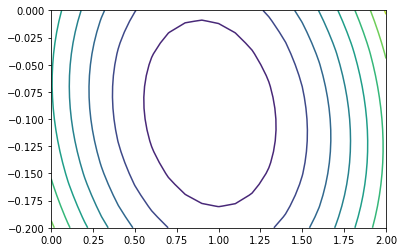

In [9]:
#Question 8

contour(A, B, err)   #contour plot

Question 9

In [10]:
#Question 9

#importing SciPy for least squares method
import scipy

rows = np.shape(file)[0]   #no. of rows in file

#same way of calculating M matrix as in Question 6
M = np.array((rows, 2))    
col1 = np.array(rows)
col2 = np.array(rows)
col2 = t.T
col1 = sp.jn(2,t).T
M = c_[col1, col2]

#returning values of A and B which gives least square error
scipy.linalg.lstsq(M, file[:,1])[0]

array([ 1.05241025, -0.10518303])

Question 10

Text(0, 0.5, 'Error')

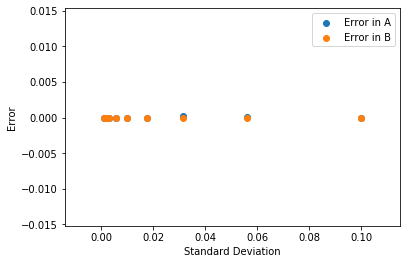

In [16]:
#Question 10

columns = np.shape(file)[1]    #no. of columns in file
#A, B, error matrices
A = np.array(columns-1);  
B = np.array(columns-1); 
err_A = np.array(columns-1); 
err_B = np.array(columns-1); 

[A,B] = scipy.linalg.lstsq(M, file[:, range(1,columns)])[0]  #least square error values of A and B
err_A = (A - 1.05) ** 2        #corresponding value of error in the value of A
err_B = (B + 0.105) ** 2      #corresponding value of error in the value of B,normalisation

plt.scatter(scl,err_A, label = "Error in A") #error in A vs standard deviation graph
plt.scatter(scl,err_B, label = "Error in B") #error in B vs standard deviation graph
plt.legend()
xlabel("Standard Deviation")            #label along x axis
ylabel("Error")                         #label along y axis

Question 11

<ErrorbarContainer object of 3 artists>

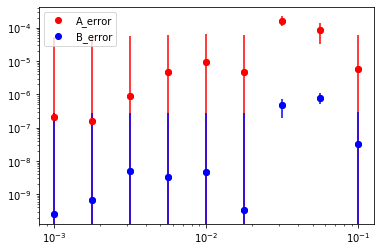

In [21]:
#Question 11:

loglog(scl, err_A, 'ro', label = "A_error")
loglog(scl, err_B, 'bo', label = "B_error")
plt.legend()
errorbar(scl, err_A, std(err_A), fmt='ro')
errorbar(scl, err_B, std(err_B), fmt='bo')

In [13]:
#//////////////////////////////////////////////

In [26]:
columns

10

In [12]:
len(scl)

9

In [11]:
A

array([2.08577693, 2.07306053, 2.06746835, 2.07093445, 2.06897938,
       2.07206945, 2.07001372, 2.07090723, 2.0707202 ])

In [27]:
C = np.array(columns-1); D = np.array(columns-1)
for i in range(1,columns):
    C[i-1] = scipy.linalg.lstsq(M, file[:,i])[0][0]
    D[i-1] = scipy.linalg.lstsq(M, file[:,i])[0][1]

IndexError: too many indices for array

In [19]:
C

1.04607919042514

In [20]:
D

-0.1044996230287787

In [32]:
shape(file)

(101, 10)

In [34]:
print(range(1,columns))

range(1, 10)


In [37]:
range(1,10)[8]

9

In [14]:
err_B

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
len(err_A)

10

In [50]:
columns

10

In [54]:
A

array([1.04625347, 1.01163049, 1.04607919, 1.05064435, 1.05093798,
       1.04981517, 1.05024098, 1.0495728 , 1.05002243])

In [15]:
B

array([-0.10518303, -0.10410562, -0.10431415, -0.10498149, -0.10506786,
       -0.10505809, -0.10493011, -0.1049739 , -0.1049841 ])